In [1]:
!unzip Images.zip

unzip:  cannot find or open Images.zip, Images.zip.zip or Images.zip.ZIP.


In [2]:
!unzip Airplanes_Annotations.zip

unzip:  cannot find or open Airplanes_Annotations.zip, Airplanes_Annotations.zip.zip or Airplanes_Annotations.zip.ZIP.


In [3]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [4]:
path = "Images"
annot = "Airplanes_Annotations"

airplane_470.jpg


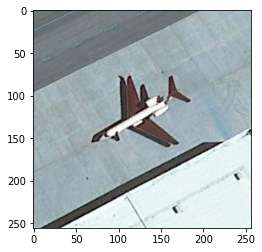

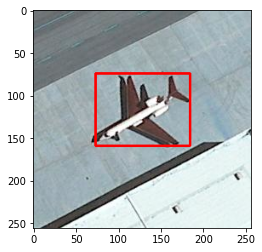

In [5]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [6]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

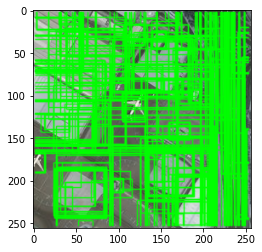

In [7]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [8]:
train_images=[]
train_labels=[]

In [9]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [10]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [11]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_470.jpg
1 airplane_030.jpg
2 airplane_174.jpg
3 airplane_072.jpg
4 airplane_647.jpg
5 airplane_479.jpg
7 airplane_292.jpg
8 airplane_318.jpg
9 airplane_099.jpg
10 airplane_074.jpg
11 airplane_240.jpg
12 airplane_272.jpg
13 airplane_651.jpg
14 airplane_492.jpg
15 airplane_252.jpg
16 airplane_457.jpg
17 airplane_236.jpg
18 airplane_510.jpg
20 airplane_245.jpg
21 airplane_600.jpg
22 airplane_566.jpg
23 airplane_273.jpg
24 airplane_426.jpg
25 airplane_698.jpg
26 airplane_507.jpg
27 airplane_175.jpg
28 airplane_146.jpg
29 airplane_281.jpg
30 airplane_333.jpg
31 airplane_541.jpg
32 airplane_621.jpg
inside
33 airplane_168.jpg
34 airplane_620.jpg
35 airplane_652.jpg
36 airplane_467.jpg
37 airplane_636.jpg
38 airplane_138.jpg
39 airplane_591.jpg
40 airplane_555.jpg
inside
41 airplane_121.jpg
inside
42 airplane_037.jpg
43 airplane_119.jpg
inside
44 airplane_328.jpg
inside
45 airplane_380.jpg
46 airplane_665.jpg
47 airplane_542.jpg
48 airplane_458.jpg
49 airplane_066.jpg
50 airplane_56

In [12]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [13]:
X_new.shape

(30229, 224, 224, 3)

In [14]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D

In [15]:
#vggmodel = VGG16(weights='imagenet', include_top=True)
#vggmodel.summary()
inceptionmodel = InceptionV3(weights='imagenet',include_top=False)

In [16]:
for layers in (inceptionmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [17]:
X = inceptionmodel.layers[-2].output
#X = inceptionmodel.output
X = GlobalAveragePooling2D()(X)
#X = tf.keras.layers.GlobalAveragePooling2D()(X)
X = Dense(1024, activation ='relu')(X)

In [18]:
predictions = Dense(2, activation ="softmax")(X)

In [19]:
model_final = Model(input = inceptionmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [20]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [21]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [22]:
model_final.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [24]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [25]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [26]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [27]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(27206, 224, 224, 3) (3023, 224, 224, 3) (27206, 2) (3023, 2)


In [28]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [30]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [31]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

Epoch 1/1000
10/10 [==============================] - 33s 3s/step - loss: 0.5114 - accuracy: 0.7875 - val_loss: 30.5224 - val_accuracy: 0.6562

Epoch 00001: val_loss improved from inf to 30.52239, saving model to ieeercnn_vgg16_1.h5
Epoch 2/1000
10/10 [==============================] - 20s 2s/step - loss: 0.2895 - accuracy: 0.8813 - val_loss: 59.9898 - val_accuracy: 0.7031

Epoch 00002: val_loss did not improve from 30.52239
Epoch 3/1000
10/10 [==============================] - 20s 2s/step - loss: 0.2421 - accuracy: 0.9031 - val_loss: 82.0766 - val_accuracy: 0.7031

Epoch 00003: val_loss did not improve from 30.52239
Epoch 4/1000
10/10 [==============================] - 20s 2s/step - loss: 0.1848 - accuracy: 0.9375 - val_loss: 52.6677 - val_accuracy: 0.7500

Epoch 00004: val_loss did not improve from 30.52239
Epoch 5/1000
10/10 [==============================] - 20s 2s/step - loss: 0.1916 - accuracy: 0.9250 - val_loss: 120.4906 - val_accuracy: 0.6406

Epoch 00005: val_loss did not impr

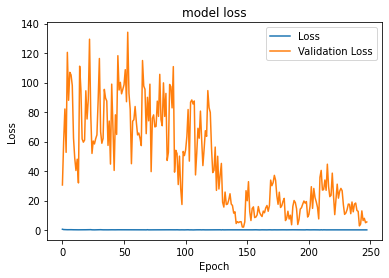

3023/3023 [==============================] - 61s 20ms/step
Test loss 6.660288648182613
Test accuracy 0.6824346780776978


<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

scores = model_final.evaluate(X_test, y_test, verbose=1)

print("Test loss", scores[0])
print("Test accuracy", scores[1])

not plane


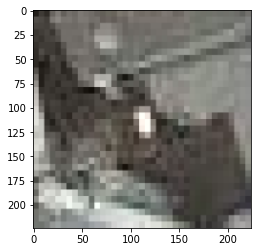

In [40]:
im = X_test[1600]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

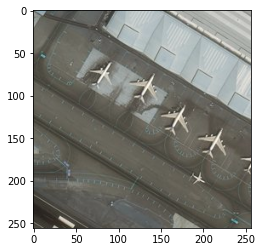

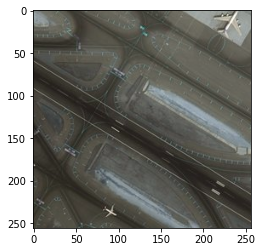

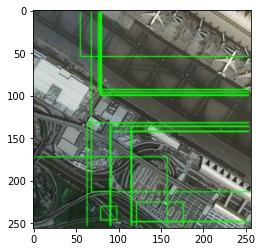

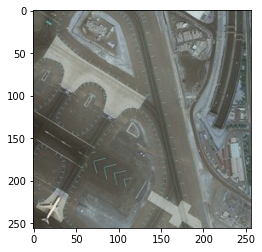

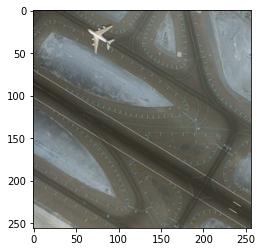

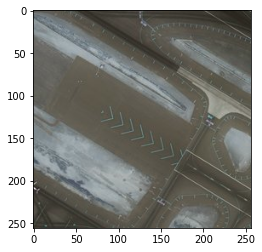

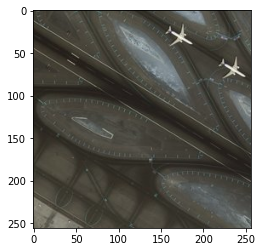

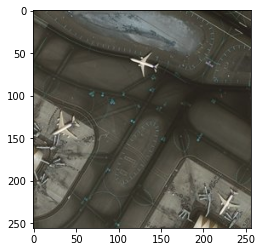

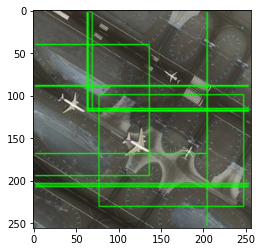

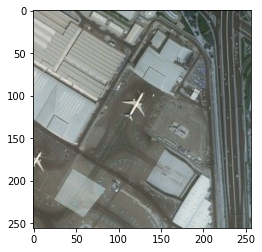

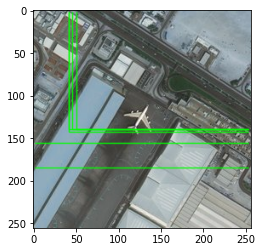

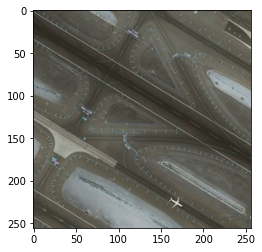

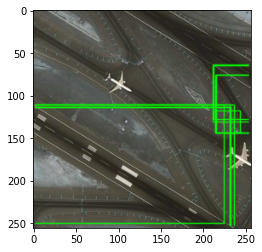

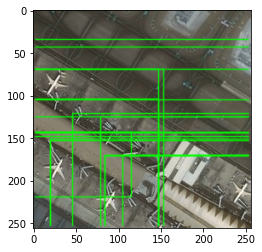

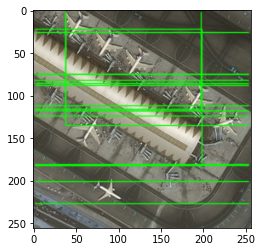

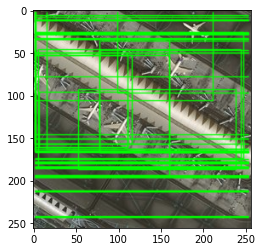

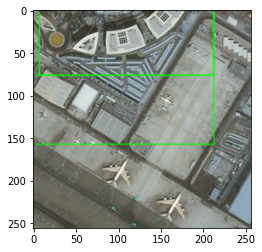

In [34]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)